# AMS Project 2

# Imports

In [1]:
import pandas as pd
from scipy.stats import skew, kurtosis, spearmanr
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.integrate import quad
import seaborn as sns
from scipy.stats import norm

# 1. Task 1: Types of Measures and Central Tendency (10%)

### 1A.  Identify and categorize the columns in the dataset as numeric or categoric.

In [2]:
datalink = "https://github.com/anshupandey/Machine_Learning_Training/raw/master/datasets/global_superstore_2016.xlsx"
mydf = pd.read_excel(datalink, sheet_name='Orders')
mydf.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [3]:
mydf.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [4]:
print(mydf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [5]:
mydf.select_dtypes(include=['float64']).columns.tolist()

['Postal Code', 'Sales', 'Discount', 'Profit', 'Shipping Cost']

In [6]:
mydf.select_dtypes(include=['int64']).columns.tolist()

['Row ID', 'Quantity']

In [7]:
mydf.select_dtypes(include=['object']).columns.tolist()

['Order ID',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Region',
 'Market',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Order Priority']

In the above dataset, the numerical variables are: Row ID(int64), Postal Code(float64), Sales(float64), Quantity(int64), Discount(float64), Profit(float64) and Shipping Cost(float64)</br></br>
Categorical columns are: 'Order ID',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Region',
 'Market',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name' and
 'Order Priority'</br></br>
The date-time columns are (can be considered categorical): Order Date and Ship Date.</br>


### 1B.  Calculate measures of central tendency (mean, median, mode) for the numeric columns.

In [8]:
meaningfulnumcol = ['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
for i in meaningfulnumcol:
    print(f"{i}:\nMean: {mydf[i].mean()}")
    print(f"Median: {mydf[i].median()}")
    print(f"Mode: {mydf[i].mode().iloc[0]}\n")

Postal Code:
Mean: 55190.3794276566
Median: 56430.5
Mode: 10035.0

Sales:
Mean: 246.4905812025736
Median: 85.053
Mode: 12.96

Quantity:
Mean: 3.4765451355039967
Median: 3.0
Mode: 2

Discount:
Mean: 0.14290754533047376
Median: 0.0
Mode: 0.0

Profit:
Mean: 28.610982477675957
Median: 9.24
Mode: 0.0

Shipping Cost:
Mean: 26.478567038409036
Median: 7.79
Mode: 1.35



# 2. Task 2: Measure of Spread and Shape (10%)

### 2A.  Calculate measures of spread (range, variance, standard deviation) for the numeric columns.

In [9]:
meaningfulnumcol = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
for i in meaningfulnumcol:
    print(f"{i}:\nRange: {mydf[i].max() - mydf[i].min()}")
    print(f"Variance: {mydf[i].var()}")
    print(f"Standard Deviation: {mydf[i].std()}\n")

Sales:
Range: 22638.036
Variance: 237719.98079710017
Standard Deviation: 487.5653605385643

Quantity:
Range: 13
Variance: 5.192775912925019
Standard Deviation: 2.2787663138033745

Discount:
Range: 0.85
Variance: 0.045062769396555916
Standard Deviation: 0.21227993168586595

Profit:
Range: 14999.954
Variance: 30394.77448304805
Standard Deviation: 174.34097190003288

Shipping Cost:
Range: 932.5680000000001
Variance: 3277.7197380584653
Standard Deviation: 57.25137324168273



Using libraries to do the same:

In [10]:
mydf.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2014-05-11 21:26:49.155780608,2014-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.478567
min,1.00000,2012-01-01 00:00:00,2012-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,12823.25000,2013-06-19 00:00:00,2013-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2014-07-08 00:00:00,2014-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2015-05-22 00:00:00,2015-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2015-12-31 00:00:00,2016-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.251373


### 2B.  Analyze the shape of the data distribution using skewness and kurtosis.

In [11]:
meaningfulnumcol = [ 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
for i in meaningfulnumcol:
    print(f"{i}:\nSkewness: {skew(mydf[i])}")
    print(f"Kurtosis: {kurtosis(mydf[i])}\n")

Sales:
Skewness: 8.137842017336729
Kurtosis: 176.7138548027632

Quantity:
Skewness: 1.3603279457897046
Kurtosis: 2.2755498916923456

Discount:
Skewness: 1.387733965689321
Kurtosis: 0.7164955650888873

Profit:
Skewness: 4.157066952869823
Kurtosis: 291.38256518766633

Shipping Cost:
Skewness: 5.8726888810714515
Kurtosis: 50.14083939361347



Analysis:</br>
1. Sales:
    1. Skewness: A skewness value of 8.14 indicates that the distribution is highly positively skewed. This means there are a few extremely high sales values pulling the distribution to the right.
    2. Kurtosis: A kurtosis value of 176.71 is extremely high, indicating a distribution with very heavy tails and a sharp peak. This suggests the presence of outliers with very high sales values.
2. Quantity:
    1. Skewness: A skewness value of 1.36 indicates a moderately positively skewed distribution. There are more quantities on the lower side, with fewer large quantity values.
    2. Kurtosis: A kurtosis value of 2.28, which is close to the normal distribution value of 3, suggests that the tails of the distribution are similar to that of a normal distribution, though slightly less pronounced.
3. Discount
    1. Skewness: A skewness value of 1.39 indicates a moderately positively skewed distribution, with more lower discount values and fewer higher discount values.
    2. Kurtosis: A kurtosis value of 0.72 is lower than 3, indicating a distribution with lighter tails and a flatter peak compared to a normal distribution.
4. Profit:
    1. Skewness: A skewness value of 4.16 indicates a highly positively skewed distribution, suggesting that most profit values are low with a few very high values.
    2. Kurtosis: A kurtosis value of 291.38 is extremely high, indicating a distribution with very heavy tails and a sharp peak, suggesting the presence of significant outliers with very high profit values.
5. Shipping Cost:
    1. Skewness: A skewness value of 5.87 indicates a highly positively skewed distribution, meaning there are a few very high shipping cost values.
    2. Kurtosis: A kurtosis value of 50.14 indicates a distribution with heavy tails and a sharp peak, suggesting the presence of significant outliers with very high shipping costs.

Summary:</br>
Sales, Profit, and Shipping Cost: These distributions are highly positively skewed and have very high kurtosis values, indicating the presence of significant outliers and heavy tails.</br>
Quantity and Discount: These distributions are moderately positively skewed with lower kurtosis values, indicating a more typical distribution shape with fewer outliers.

# 3. Task 3: Covariance and Correlation Analysis (20%)

### 3A.  Calculate covariance and Pearson correlation between Sales and Profit.

In [12]:
#  Co-variance using pandas
mydf['Sales'].cov(mydf['Profit'])

41219.309486429745

In [13]:
# Co-variance using numpy
spdf_cov = np.cov(mydf['Sales'], mydf['Profit'])
print(spdf_cov[0][1])

41219.309486429745


Analysis:</br>
Co-variance 41219.309486429745 indicates a positive correlation between Sales and Profit, however it doesn't tell the strength of the correlation.

In [14]:
# Pearson correlation using pandas
mydf['Sales'].corr(mydf['Profit'], method='pearson')

0.48491811261944445

In [15]:
# Pearson correlation using numpy
spdf_cor = np.corrcoef(mydf['Sales'], mydf['Profit'])
print(spdf_cor[0][1])

0.48491811261944445


Analysis</br>
0.48491811261944445 indicates a moderate positive linear relationship between Sales and Profit.

### 3B.  Perform Spearman correlation analysis for the same variables.

In [16]:
# Spearman correlation using pandas
mydf['Sales'].corr(mydf['Profit'], method='spearman')

0.4901910469388152

In [17]:
# Spearman correlation using scipy
spdf_cor = spearmanr(mydf['Sales'], mydf['Profit'])
spdf_cor[0]

0.4901910469388152

Analysis</br>
0.48491811261944445 indicates a moderate positive linear relationship between Sales and Profit.

# 4. Task 4: Percentiles, Quartiles, and Outliers (20%)

### 4A.  Calculate percentiles and quartiles for Sales.

In [18]:
pc = [25, 50, 75]
sale_per = np.percentile(mydf['Sales'], pc)
SQ1, SMED, SQ3 = sale_per
print(f"Percentiles:")
print(f"Q1 = 25 percentile = {SQ1}")
print(f"Median = 50 percentile = {SMED}")
print(f"Q3 = 75 percentile = {SQ3}")

Percentiles:
Q1 = 25 percentile = 30.758625000000002
Median = 50 percentile = 85.053
Q3 = 75 percentile = 251.0532


### 4B.  Compute the interquartile range (IQR) and identify outliers using the IQR method.

In [19]:
SQIQR = SQ3 - SQ1
lfence = SQ1 - 1.5 * SQIQR
ufence = SQ3 + 1.5 * SQIQR
outl = mydf[(mydf['Sales'] < lfence) | (mydf['Sales'] > ufence)]
num_outl = len(outl)
print(f"IQR Range: {SQIQR}")
print(f"Lower fence: {lfence}")
print(f"Upper fence: {ufence}")
print(f"Number of outliers: {num_outl}")

IQR Range: 220.294575
Lower fence: -299.6832375
Upper fence: 581.4950625
Number of outliers: 5655


### 4C.  Create a BoxWhiskers plot for Sales and Profit.

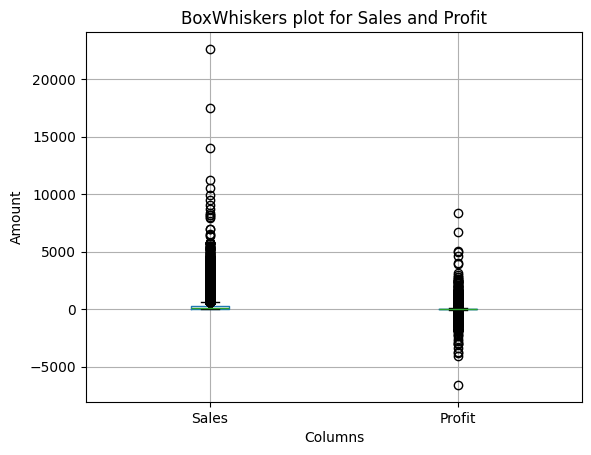

In [20]:
mydf.boxplot(column=['Sales', 'Profit'])
plt.title("BoxWhiskers plot for Sales and Profit")
plt.xlabel("Columns")
plt.ylabel("Amount")
plt.show()

# 5. Task 5: Probability Theory and Likelihood Estimation (20%)

### 5A.  Explain the concepts of probability theory, likelihood estimation, and Bayes Theorem.

Probability Theory

Probability theory is a field of mathematics focused on studying the examination of random events. The main elements of probability theory include random variables, stochastic processes, and events.</br>
</br>
Key concepts of probability:
1. Probability: A measure of the likelihood that an event will occur, ranging from 0 (impossible) to 1 (certain).
2. Random Variable: A variable whose possible values are numerical outcomes of a random phenomenon.
    1. Discrete Random Variables: Can take a finite or countably infinite number of values (example - the roll of a die).
    2. Continuous Random Variables: Can take any value within a range (example - the height of a person).
3. Probability Distribution: It describes how the values of a random variable are distributed.
    1. Discrete Distribution: Defined by a probability mass function (PMF), which gives the probability that a discrete random variable is exactly equal to some value.
    2. Continuous Distribution: Defined by a probability density function (PDF), which describes the likelihood of a continuous random variable taking on a specific value.
4. Expected Value: The long-run average value of repetitions of the experiment it represents.
5. Variance: Measures the spread of a set of values that is how much the values differ from the mean.
6. Central Limit Theorem: The distribution of sample means approaches a normal distribution.

Likelihood Estimation

Likelihood estimation involves determining the probability of observed data under different parameter values of a statistical model. It is a fundamental concept in statistical inference and maximum likelihood estimation (MLE).

Working of Likelihood Estimation:
1. Likelihood Function: Given a set of data and a statistical model, the likelihood function is a function of the model parameters that describes the probability of the observed data.
2. Maximum Likelihood Estimation (MLE): A method to estimate the parameters of a statistical model. It finds the parameter values that maximize the likelihood function.
    1. Example: Assuming there is a dataset of heights of individuals, and we assume the data follows a normal distribution with unknown mean (μ) and standard deviation (σ). MLE will find the values of μ and σ that make the observed data most probable.
3. Log-Likelihood: Often the logarithm of the likelihood function is used because it simplifies the mathematics of finding the maximum. The reason is that the log function coverts powers into multiples.

Bayes Theorem

Bayes Theorem is a fundamental theorem in probability theory which describes how to update the probabilities of hypotheses when given evidence. It is the cornerstone of Bayesian inference Bayes theorem describes the probability of an event based on prior knowledge and related conditions. The theorem is expressed as:</br></br>
P(A|B) = P(B|A).P(A)</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-----------</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;P(B)</br></br>
where,</br>
P(A|B)  is the posterior probability: the probability of hypothesis A given the evidence B.</br>
P(B|A) is the likelihood: the probability of evidence B given that A is true.</br>
P(A) is the prior probability: the initial probability of hypothesis A before seeing the evidence.</br>
P(B) is the marginal likelihood: the total probability of the evidence B under all possible hypotheses.</br></br>

Applications of Bayes Theorem:
1. Medical Diagnosis: Calculating the probability of a disease given test results.
2. Spam Filtering: Determining whether an email is spam based on its content.
3. Machine Learning: Bayesian inference is used to update the parameters of a model as new data becomes available.

### 5B.  Provide mathematical intuition and laws of probability.

Laws of probability -
1. Kolmogorov's axioms are the foundation of probability theory, consisting of three main axioms:
    1. Non-negativity: P(A) >= 0 i.e. The probability of any event A is a non-negative number.
    2. Normalization: P(S) = 1. The probability of the sample space S is 1. The sample space represents all possible outcomes of an experiment.
    3. Additivity: For any two mutually exclusive events A and B, P(A U B) = P(A) + P(B)
2. Addition and Multiplication Rules:
    1. Addition Rule (for non-mutually exclusive events): P(A∪B)=P(A)+P(B)−P(A∩B)
    2. Multiplication Rule (for dependent events): P(A∩B)=P(A)⋅P(B|A) for two events A and B, where P(B|A) is the conditional probability of B given A.
    3. Multiplication Rule (for independent events): P(A∩B)=P(A)⋅P(B) if A and B are independent, the occurrence of one event does not affect the probability of the other.
3. Conditional Probability:
    1. Conditional probability is the probability of an event occurring given that another event has already occurred. It is defined as:</br>
    P(A|B) = P(A∩B)/P(B) provided P(B) > 0.
4. Law of Total Probability:
    1. The law of total probability provides a way to compute the probability of an event based on a partition of the sample space. If {Bi} is a partition of the sample space S, then:</br>
    P(A) = ∑i P(A∩Bi) = ∑i​	P(A|Bi)⋅P(Bi)​.
5. Bayes' Theorem:
    1. Bayes' theorem allows us to update the probability of a hypothesis based on new evidence.
    2. It is derived from the definition of conditional probability:</br>
    P(A|B)= [P(B|A)⋅P(A)]/P(B)</br>
    where,</br>
    P(B)=∑i​ P(B|Ai)⋅P(Ai) if {Ai} is a partition of the sample space.

Mathematical inuition with examples:</br>
1. Non-negativity: Probabilities cannot be negative. For example, it is nonsensical to say there is a -20% chance of raining tomorrow.
2. Normalization: The probability of all possible outcomes must sum to 1.
3. For example, in a single roll of a fair six-sided die, the probability of rolling any one of the six sides is 1/6, and the total probability is 1 (i.e. (1/6)x6 = 1)
4. Additivity: If you are calculating the probability of either event A or B happening, and they cannot both happen at the same time, you simply add their probabilities. For instance, the probability of rolling a 1 or a 2 on a fair six-sided die is 1/6 + 1/6 = 2/6 = 1/3.
5. Conditional Probability: If it is known that event B has occurred, the probability of event A can change. For example, the probability of drawing a king from a deck of cards is 4/52. However, if it is known that the card drawn is a face card (jack, queen, or king), the probability of it being a king is now 4/12 because there are 12 face cards in total.
6. Bayes Theorem: This theorem is useful in various real-life applications, such as medical diagnostics. For example, if 1% of a population has a disease (prior probability), and a test correctly identifies the disease 99% of the time (likelihood), Baye' theorem can help update the probability of having the disease given a positive test result (posterior probability).

### 5C.  Perform implementation exercises on these concepts using the dataset.

Demonstration of probability.

In [21]:
each_count = mydf['Category'].value_counts()
prob = each_count / len(mydf)
print(f"Probability of each order category:{prob}")

Probability of each order category:Category
Office Supplies    0.610041
Technology         0.197719
Furniture          0.192240
Name: count, dtype: float64


Example demonstration of estimation of likelihood for a profit of 100$.

In [22]:
profit = mydf['Profit']
print(profit.describe())
lk_est = stats.gaussian_kde(profit)
kde_func = lambda x: lk_est(x)
lower_bound = 100
upper_bound = np.inf
prob_profit_gte_100, _ = quad(kde_func, lower_bound, upper_bound)
prob_profit_lt_100, _ = quad(kde_func, -np.inf, lower_bound)
print(f"\nLikelihood of profit >= 100 dollars = {prob_profit_gte_100}")
print(f"\nLikelihood of profit < 100 dollars = {prob_profit_lt_100}")

count    51290.000000
mean        28.610982
std        174.340972
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.976000
Name: Profit, dtype: float64


/var/folders/p0/sy3m41v11lg_l368z31s76jw0000gn/T/ipykernel_46716/2167117033.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  prob_profit_gte_100, _ = quad(kde_func, lower_bound, upper_bound)



Likelihood of profit >= 100 dollars = 0.11621912895105539

Likelihood of profit < 100 dollars = 0.8836653406677343


/var/folders/p0/sy3m41v11lg_l368z31s76jw0000gn/T/ipykernel_46716/2167117033.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  prob_profit_lt_100, _ = quad(kde_func, -np.inf, lower_bound)


Example demonstration of Baye's theorem using above dataset.

Assuming an order is considered profitable if the profit >= 100.</br>
A profit value of 120 is observed for a specific order.</br>
Finding the probability that the customer is profitable given their profit value is 120.

In [23]:
profit_threshold = 100
observed_profit = 120
total_orders = len(mydf)
profitable_orders = len(mydf[mydf['Profit'] >= profit_threshold])
P_H = profitable_orders / total_orders
profit = mydf['Profit']
kde = stats.gaussian_kde(profit[profit >= profit_threshold])
P_E_given_H = kde(observed_profit)[0]
kde_total = stats.gaussian_kde(profit)
P_E = kde_total(observed_profit)[0]
P_H_given_E = (P_E_given_H * P_H) / P_E
print(f"Prior probability (P(H)): {P_H}")
print(f"Likelihood (P(E|H)): {P_E_given_H}")
print(f"Marginal likelihood (P(E)): {P_E}")
print(f"Posterior probability (P(H|E)): {P_H_given_E}")

Prior probability (P(H)): 0.11259504776759602
Likelihood (P(E|H)): 0.003347757610974203
Marginal likelihood (P(E)): 0.0008460899343690197
Posterior probability (P(H|E)): 0.44550929258256816


# 6. Task 6: Sampling Techniques and Confidence Intervals (10%)

### 6A.  Explain the concepts of sample, population, and sampling bias.

**Population:**

Population refers to the entire set of individuals, items, or data points that are of interest to a researcher/statistician. It is the complete collection of all elements under study that share common observable characteristics.

Examples:
1. Example 1: For the study of average height of all adult males in a country, the population would be all adult males in that country.
2. Example 2: For the analysis of the performance of a specific model of car, the population would be all cars of that model manufactured by a particular company.

In statistical terms, the population is the entire group that a researcher aims to draw conclusions about.

**Sample:**

A sample is a subset of the population that is selected for study. The process of selecting this subset is called sampling.

Sampling involves choosing a representative group from the larger population to gather insights or make inferences about the population as a whole. The goal of sampling is to obtain accurate and valid information about the population without needing to study every single individual or element within it.

Example:
1. Instead of measuring the height of every single adult male in a country (which would be impractical), a random sample of adult males can be selected and measure their heights to estimate the average height of the entire population.
2. Survey by a company of a sample of its customers to understand their satisfaction levels rather than surveying every customer.

If a sample is well-chosen then it becomes representative of the population and can accurately reflect the characteristics and diversity of the larger group.

**Sampling Bias:**

Sampling bias occurs when the sample selected is not representative of the population from which it is drawn. This can lead to inaccurate conclusions and findings because the sample will not accurately reflect the characteristics of the population.

Sampling bias can arise due to below reasons:
1. Selection bias: This occurs when certain individuals or elements of the population are systematically more likely to be included in the sample than others. For example, if a survey is conducted only among people who have internet access, it may not represent the entire population accurately.
2. Non-response bias: This happens when individuals or elements of the population refuse or are unable to participate in the study, and their absence from the sample skews the results.
3. Measurement bias: This occurs when the methods used to measure or collect data favor certain outcomes over others, leading to a biased sample.

Sampling bias must be addressed. It is crucial to ensure the validity and reliability of statistical findings. Techniques such as random sampling, stratified sampling, and careful consideration of the sampling frame can mitigate bias and improve the representativeness of the sample.

### 6B.  Calculate the sample mean for Sales.

In [24]:
sample_mean_sales = mydf['Sales'].mean()
print(f"The sample mean of sales = {sample_mean_sales}")

The sample mean of sales = 246.4905812025736


### 6C.  Construct confidence intervals for the mean Sales.

In [25]:
sales_df = mydf['Sales']
confidence = 0.95 # 95%
sample_mean = sales_df.mean()
sem = stats.sem(sales_df)
dof = len(sales_df) - 1
t_value = stats.t.ppf((1 + confidence) / 2, dof)
margin_of_error = sem * t_value
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print(f"Confidence interval for mean sales (95%): {confidence_interval}")

Confidence interval for mean sales (95%): (242.27094670992258, 250.7102156952246)


# 7. Task 7: Probability Distribution Functions (10%)

### 7A.  Explain the probability distribution functions, focusing on continuous, normal, and standard normal distributions.

**Probability distribution function (PDF):**</br>
A probability distribution function (PDF) describes the likelihood of a random variable taking on a particular value or set of values.</br>
It maps out the probabilities of all possible outcomes of a random variable.</br>
For a continuous random variable X, the PDF is denoted as f(x), where f(x)≥0 for all x and the total area under the curve equals 1.</br>

Key Properties of PDF:
1. Non-negative values: f(x)≥0 for all x.
2. Area under the curve: The total area under the PDF curve over all possible values of x is equal to 1, representing the total probability of all possible outcomes.

Interpretation of PDF:
1. Probability interpretation:  The value of f(x) itself does not represent a probability (since probabilities are defined over intervals), the probability of X falling within a specific interval [a,b] is given by the integral of f(x) over that interval:</br>
P(a≤X≤b)=∫ab f(x)dx
2. Height of the PDF: The height of the PDF at a particular point x (i.e. f(x)) indicates the relative likelihood of observing X near x. Higher values of f(x) indicates that x is more likely to occur compared to lower values.

**Cumulative Distribution Function (CDF)**</br>
The Cumulative Distribution Function (CDF), denoted as F(x), gives the probability that a random variable X takes on a value less than or equal to x. In other words, it provides the cumulative probability up to x.</br>
It is given by:</br>
F(x)=P(X≤x) = ∫ −∞,x​	f(t)dt

Key Properties of CDF:
1. Monotonicity: F(x) is non-decreasing; as x increases, F(x) either remains constant or increases.
2. Range: 0≤F(x)≤1 for all x.
3. Behavior at extremes: F(−∞) = 0 and F(+∞) = 1.

Interpretation:
F(x) gives the probability that the random variable X is less than or equal to x. Therefore, F(x) provides a cumulative view of the distribution, showing how probabilities accumulate as x increases.

**Continuous Probability Distributions:**</br>
In continuous probability distributions, the random variable can take on any value within a certain range (typically an interval of real numbers).

Key characteristics of continuous distributions are:
1. Probability Density Function (PDF): This function, denoted as f(x) specifies the probability density (probability per unit length on the x-axis) at each possible value x. The area under the PDF curve over a range of values gives the probability that the random variable falls within that range.
2. Cumulative Distribution Function (CDF): The CDF, denoted as F(x), gives the probability that the random variable takes on a value less than or equal to x. It is the integral of the PDF from negative infinity to x.
3. Example: Normal distribution, exponential distribution, uniform distribution, and beta distribution.

**Normal distribution:**</br>
The normal distribution, also known as the Gaussian distribution, is one of the most important and widely used continuous probability distributions.
</br>Its PDF is given by:</br>
f(x|μ,σ^2) = 1/Sqrt((2πσ^2)) exp(−((x−μ)^2)/2σ^2)</br>
where:</br>
μ (mean) specifies the center of the distribution.</br>
σ^2 (variance) controls the spread or dispersion of the distribution.

Characteristics of the Normal Distribution:
1. Bell-shaped curve: The PDF of the normal distribution is symmetric and bell-shaped, with its peak at the mean μ.
2. 68-95-99.7 Rule: Approximately 68% of the data falls within one standard deviation (σ) of the mean, 95% within two standard deviations, and 99.7% within three standard deviations.
3. Standard Normal Distribution: A special case of the normal distribution where μ = 0 and σ = 1
4. The standard normal distribution is denoted by Z ∼ N(0,1).

**Standard Normal Distribution:**</br>
The standard normal distribution is a specific normal distribution with a mean μ=0 and variance σ^2 = 1.</br>
Its PDF is:</br>
ϕ(z) = 1/Sqrt(2π) exp(−((z^2)/2))</br>
where,</br>
z is the standardized variable (z = x−μ/σ).

Characteristics of the Standard Normal Distribution:
1. The PDF ϕ(z) has a mean of 0 and a standard deviation of 1.
2. It is symmetric about z = 0, with the peak occurring at z = 0.
3. The CDF Φ(z) is often computed to find probabilities associated with the standard normal distribution.

### 7B.  Implement and visualize these distributions using the Sales data.

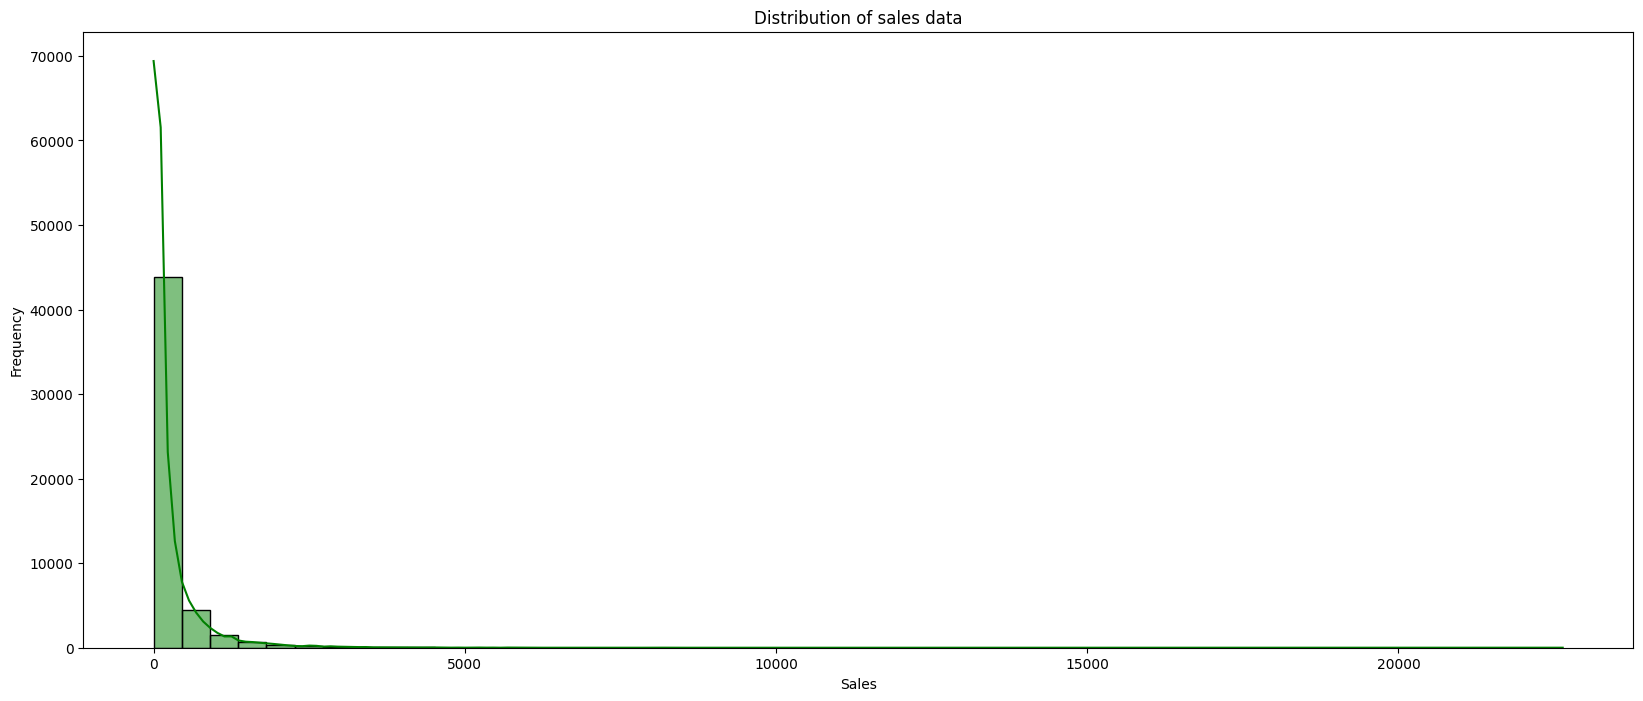

In [26]:
plt.figure(figsize=(20, 8))
sns.histplot(mydf['Sales'], bins=50, kde=True, color='green')
plt.title('Distribution of sales data')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

/var/folders/p0/sy3m41v11lg_l368z31s76jw0000gn/T/ipykernel_46716/2721084452.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(np.linspace(xmin, xmax, 100), p, 'k', linewidth=2, color='green', label=f'Normal Distribution\n$\mu={mean:.2f}$, $\sigma={std:.2f}$')


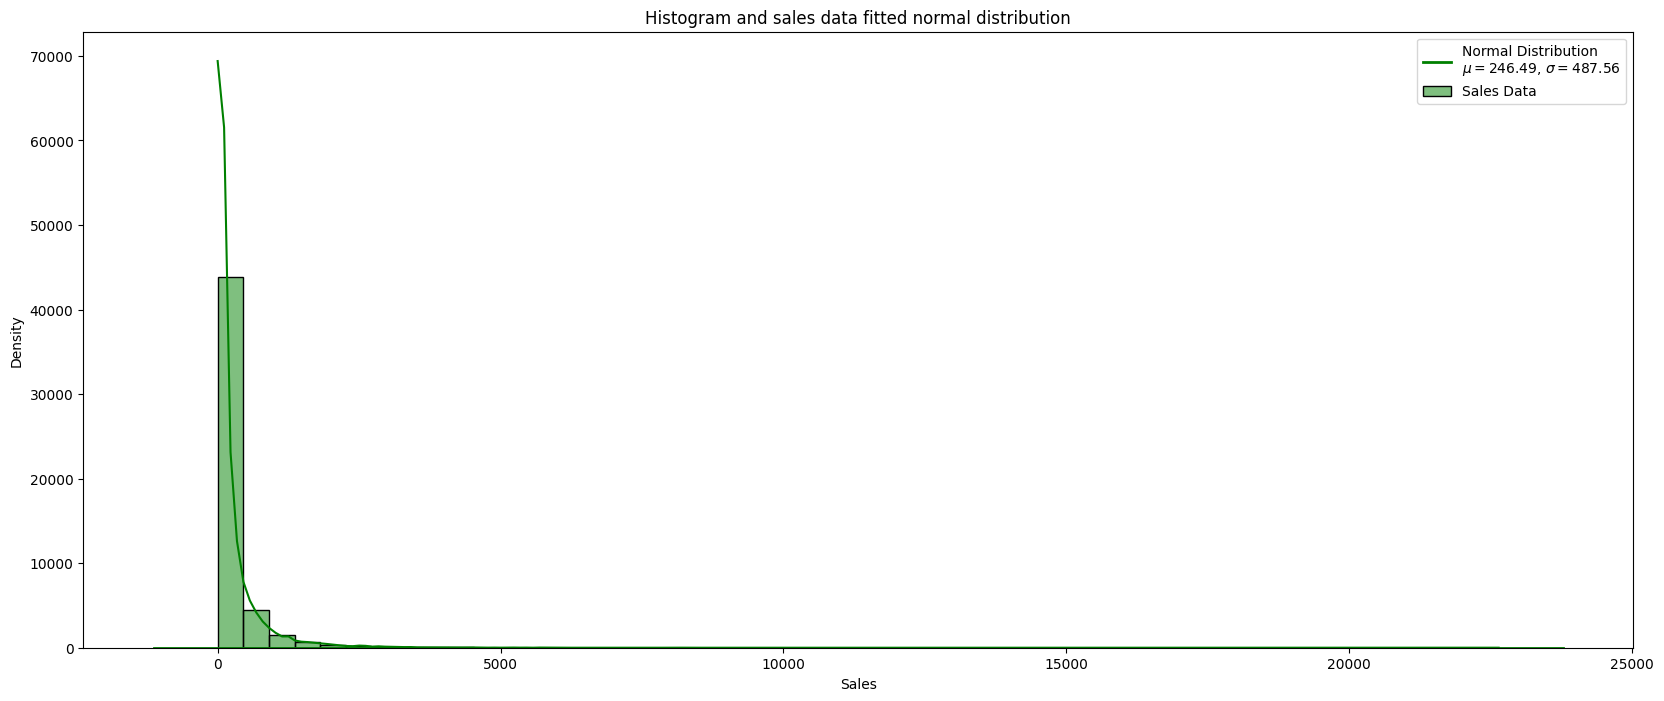

In [27]:
# Normal distribution
mean, std = norm.fit(sales_df)
plt.figure(figsize=(20, 8))
sns.histplot(mydf['Sales'], bins=50, kde=True, color='green', label='Sales Data')

# PDF of the fitted normal distribution
xmin, xmax = plt.xlim()
p = norm.pdf(np.linspace(xmin, xmax, 100), mean, std)
plt.plot(np.linspace(xmin, xmax, 100), p, 'k', linewidth=2, color='green', label=f'Normal Distribution\n$\mu={mean:.2f}$, $\sigma={std:.2f}$')

plt.title('Histogram and sales data fitted normal distribution')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.legend()
plt.show()

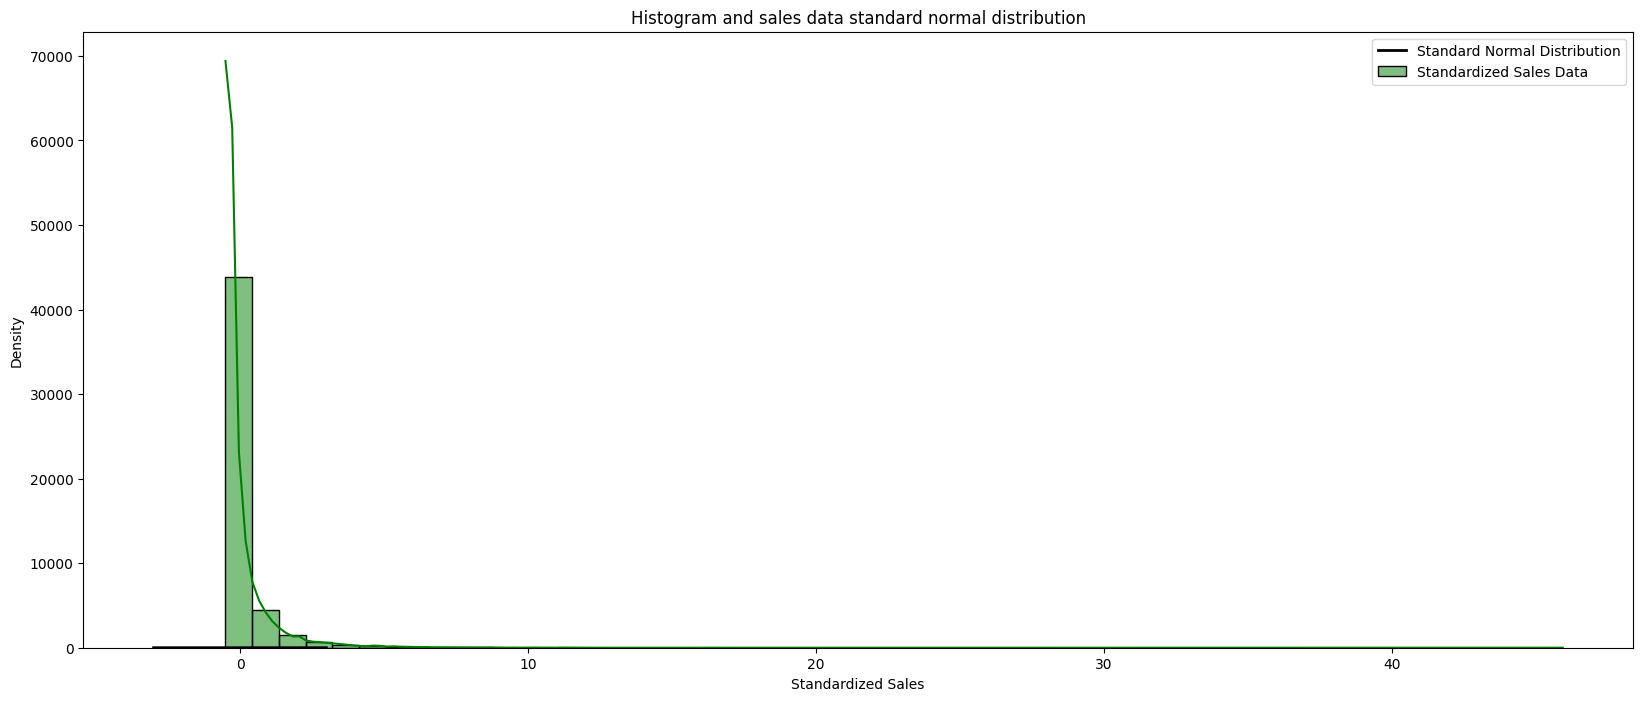

In [28]:
# Standardize Sales data to fit standard normal distribution
sales_z = (sales_df - mean) / std
plt.figure(figsize=(20, 8))
sns.histplot(sales_z, bins=50, kde=True, color='green', label='Standardized Sales Data')

# PDF of the standard normal distribution
xstd = np.linspace(-3, 3, 100)
pstd = norm.pdf(xstd, 0, 1)
plt.plot(xstd, pstd, 'k', linewidth=2, label='Standard Normal Distribution')

plt.title('Histogram and sales data standard normal distribution')
plt.xlabel('Standardized Sales')
plt.ylabel('Density')
plt.legend()
plt.show()